In [1]:
import pandas as pd
import numpy as np

Nguyễn Thị Ngọc Bích
MSSV: 22637851

Câu 1



In [3]:
df = pd.read_csv("./penguins-data.csv")

In [11]:
##Câu 1a
count = df['species'].value_counts()

count

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [12]:
##Câu 1b
df.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,172.303303,43.992793,17.164865,200.966967,4207.057057
std,97.346548,5.468668,1.969235,14.015765,805.215802
min,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,89.000000,39.500000,15.600000,190.000000,3550.000000
50%,172.000000,44.500000,17.300000,197.000000,4050.000000
75%,256.000000,48.600000,18.700000,213.000000,4775.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000


- Trung bình (mean):Trọng lượng trung bình của chim cánh cụt là khoảng 4207.06 grams.
- Độ lệch chuẩn của trọng lượng là khoảng 805.22 grams, cho biết mức độ biến động của trọng lượng trong dữ liệu.
- Trọng lượng nhỏ nhất là 2700 grams và trọng lượng lớn nhất là 6300 grams. Điều này cho thấy có sự đa dạng lớn về trọng lượng giữa các cá thể chim cánh cụt.
- Dữ liệu cho thấy có sự biến động đáng kể trong trọng lượng của chim cánh cụt, từ 2700 grams đến 6300 grams. Trung vị là một chỉ số trung tâm thích hợp hơn trung bình khi dữ liệu có độ biến động cao. Phân vị cung cấp thông tin chi tiết hơn về phân bố của trọng lượng.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

Câu 2

Text(0, 0.5, 'Số lượng')

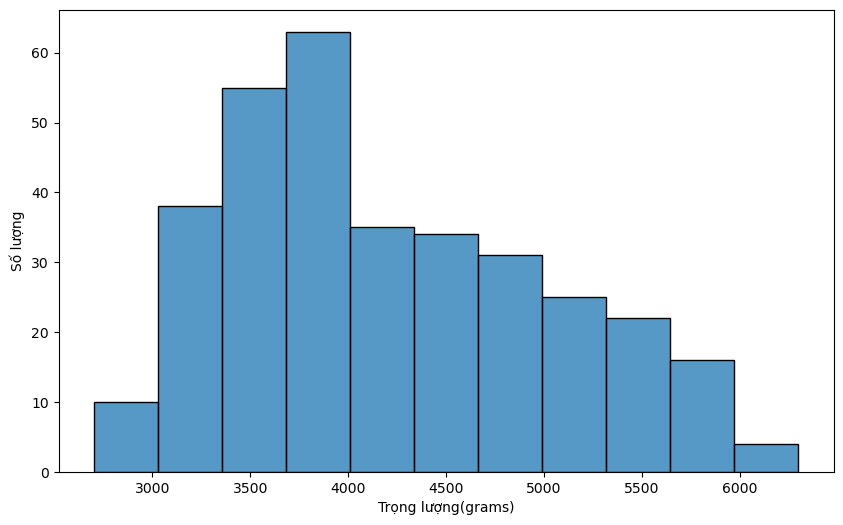

In [31]:
##Câu a
plt.figure(figsize = (10,6))
sb.histplot(df['body_mass_g'])
plt.xlabel('Trọng lượng(grams)')
plt.ylabel('Số lượng')

<Axes: xlabel='species', ylabel='body_mass_g'>

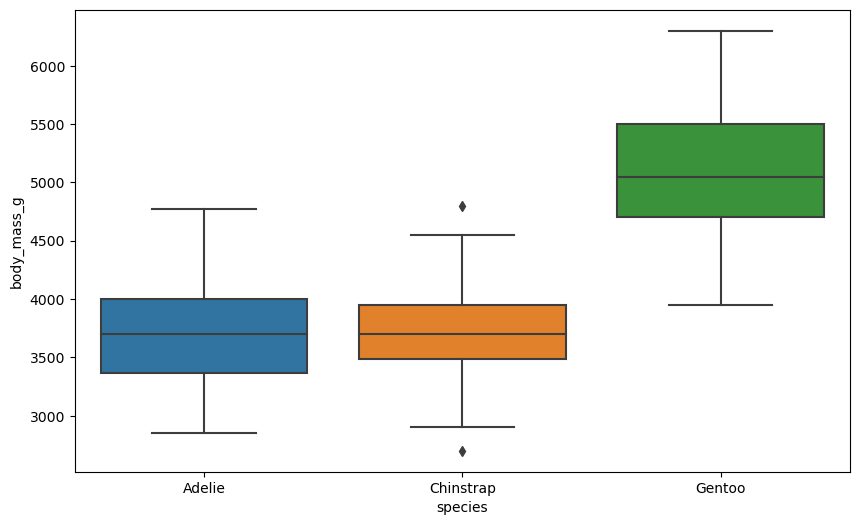

In [29]:
##Câu b
plt.figure(figsize = (10,6))
sb.boxplot(x = df['species'], y = df['body_mass_g'])

Câu c
Thuộc tính định lượng 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm' có khảu năng có mối tương quan tuyến tính với 'body_mass_g'

Câu d


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# thuộc tính có mối tương quan tuyến tính cao nhất với 'body_mass_g'
selected_feature = 'bill_length_mm'
X = df[[selected_feature]]
y = df['body_mass_g']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính đơn giản
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Hệ số hồi quy cho {selected_feature}: {model.coef_[0]}')
print(f'Sai số trung bình: {mean_squared_error(y_test, y_pred)}')

def linear_regression_predict(feature_value):
    return model.predict([[feature_value]])[0]

# Sử dụng hàm hồi quy để dự đoán trọng lượng với giá trị 'bill_length_mm' mới
new_feature_value = 40
predicted_weight = linear_regression_predict(new_feature_value)
print(f'Dự đoán trọng lượng cho {selected_feature}={new_feature_value}: {predicted_weight} grams')


Hệ số hồi quy cho bill_length_mm: 89.99453748080884
Sai số trung bình: 452145.8298971058
Dự đoán trọng lượng cho bill_length_mm=40: 3845.5073751633277 grams


c:\Users\T14\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Câu 3 a

In [35]:
# Ước lượng tỷ lệ loài chim cánh cụt Gentoo từ mẫu thống kê
total_penguins = len(df)
gentoo_count = len(df[df['species'] == 'Gentoo'])

estimated_gentoo_ratio = gentoo_count / total_penguins
print(f'Ước lượng tỷ lệ loài chim cánh cụt Gentoo: {estimated_gentoo_ratio:.2%}')

Ước lượng tỷ lệ loài chim cánh cụt Gentoo: 35.74%


Câu 3 b

In [37]:
# Ước lượng trọng lượng trung bình của loài chim cánh cụt Gentoo từ mẫu thống kê
gentoo_data = df[df['species'] == 'Gentoo']
estimated_gentoo_weight_mean = gentoo_data['body_mass_g'].mean()

print(f'Ước lượng trọng lượng của loài chim cánh cụt Gentoo: {estimated_gentoo_weight_mean:.2f} grams')


Ước lượng trọng lượng của loài chim cánh cụt Gentoo: 5092.44 grams
